In [1]:
# Bad Passwords and the NIST Guidelines

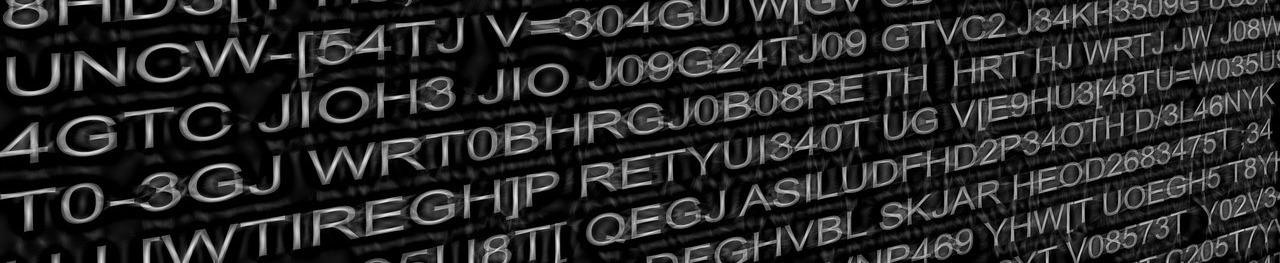

In [2]:
from IPython.display import Image
Image(filename='images/image.jpg') 

According to a 2019 <a href="https://storage.googleapis.com/gweb-uniblog-publish-prod/documents/PasswordCheckup-HarrisPoll-InfographicFINAL.pdf">Google / Harris Poll</a>, 24% of Americans have used common passwords, like <code>abc123</code>, <code>Password</code>, and <code>Admin</code>. Even more concerning, 59% of Americans have incorporated personal information, such as their name or birthday, into their password. This makes it unsurprising that 4 in 10 Americans have had their personal information compromised online. Passwords with commonly used phrases and personal information makes cracking a password drastically easier.
You may have noticed over the years that password requirements have increased in complexity, including recommendations to change your passwords every couple of months. Compiled from industry recommendations, below is a list of passwords requirements you will be asked to test: <strong>Password Requirments:</strong>

<ol>
<li>Must be at least 10 characters in length</li>
<li>Must contain at least:<ul>
<li>one lower case letter </li>
<li>one upper case letter </li>
<li>one numeric character </li>
<li>one non-alphanumeric character</li></ul></li>
<li>Must not contain the phrase <code>password</code> (case insensitive)</li>
<li>Must not contain the user's first or last name, e.g., if the user's name is <code>John Smith</code>, then <code>SmItH876!</code> is not a valid password.</li>
</ol>
Here is the dataset that you will investigate this project:
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/logins.csv</b></div>
Each row represents a login credential. There are no missing values and you can consider the dataset "clean".
<ul>
    <li><b>id:</b> the user's unique ID.</li>
    <li><b>username:</b> the username with the format {firstname}.{lastname}.</li>
    <li><b>password:</b> the password that may or may not meet the requirements. <i>Note, passwords should never be saved in plaintext, always encrypt them when working with real live passwords!</i></li>
</ul>
</div>
Warning: This dataset contains some <strong>real</strong> passwords leaked from <strong>real</strong> websites. These passwords have been filtered, but may still include words that are explicit and offensive.</p>
From here on out, it will be your task to explore and manipulate the existing data until you can answer the two questions described in the instructions panel. Feel free to import as many packages as you need to complete your task, and add cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!


## Import libraries and datasets

In [3]:
import pandas as pd
import re
import numpy as np

passwords = pd.read_csv("datasets/logins.csv")

## Presentation of dataset

In [4]:
print("The following tab present the columns: name and number of non-missing values (" + str(passwords.shape[0]) +" rows in the dataset):\n")
print(passwords.info())

print("\nThe 12 first rows of the dataset are : ")
display(passwords.head(12))

The following tab present the columns: name and number of non-missing values (982 rows in the dataset):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        982 non-null    int64 
 1   username  982 non-null    object
 2   password  982 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.1+ KB
None

The 12 first rows of the dataset are : 


,id,username,password
0,1,vance.jennings,vanceRules888!
1,2,consuelo.eaton,Mail_Pen%Scarlets.414
2,3,mitchel.perkins,Z00+1960
3,4,odessa.vaughan,D-rockyou
4,5,araceli.wilder,Araceli}r3
5,6,shawn.harrington,126_239_123
6,7,evelyn.gay,`4:&iAt$'o~(
7,8,noreen.hale,25941829163
8,9,gladys.ward,=Wj1`i)xYYZ
9,10,brant.zimmerman,L?4)OSB$r


In [5]:
print("Number of missing values by variable:")
passwords.isnull().sum()

Number of missing values by variable:


id          0
username    0
password    0
dtype: int64

## Verification of passwords criterias

Reminder : 
Password Requirments:
- Must be at least 10 characters in length
- Must contain at least:
    one lower case letter
    one upper case letter
    one numeric character
    one non-alphanumeric character
- Must not contain the phrase password (case insensitive)
- Must not contain the user's first or last name, e.g., if the user's name is John Smith, then SmItH876! is not a valid password.

### Length of 10 or more

In [6]:
passwords["validated_1"] = passwords["password"].str.len().apply(lambda x: True if x >= 10 else False)
passwords["len"] = passwords["password"].str.len()

display(passwords[["password", "len", "validated_1"]].head(12))
passwords.drop("len", axis = 1, inplace = True)

,password,len,validated_1
0,vanceRules888!,14,True
1,Mail_Pen%Scarlets.414,21,True
2,Z00+1960,8,False
3,D-rockyou,9,False
4,Araceli}r3,10,True
5,126_239_123,11,True
6,`4:&iAt$'o~(,12,True
7,25941829163,11,True
8,=Wj1`i)xYYZ,11,True
9,L?4)OSB$r,9,False


### One lower case letter, one upper case letter, one numeric character, one non-alphanumeric character

In [7]:
regex_lower = re.compile(r'[a-z]+')
regex_upper = re.compile(r'[A-Z]+')
regex_num = re.compile(r'[0-9]+')
regex_nam = re.compile(r'[^a-zA-Z0-9]+')

passwords["validated_2"] = passwords["password"].apply(lambda x:
                                                       (regex_lower.search(x) != None) &
                                                       (regex_upper.search(x) != None) &
                                                       (regex_num.search(x) != None ) & 
                                                       (regex_nam.search(x) != None ) )

                                                       
print(passwords[["password", "validated_2"]].head(20))

                      password  validated_2
0               vanceRules888!         True
1        Mail_Pen%Scarlets.414         True
2                     Z00+1960        False
3                    D-rockyou        False
4                   Araceli}r3         True
5                  126_239_123        False
6                 `4:&iAt$'o~(         True
7                  25941829163        False
8                  =Wj1`i)xYYZ         True
9                    L?4)OSB$r         True
10                @_2.#,%~>~&+        False
11                Milford<3Tom         True
12                  chichi821?        False
13  Deviants.Assists.Impede+24         True
14                  1204380071        False
15                Q0G:[@u9*_`_         True
16                     VeOw{*p        False
17                   MP1985???        False
18                      787175        False
19                     TOBBY05        False


### Not contain 'password' (case insensitive)

In [8]:
# passwords["validated_3"] = passwords["password"].str.lower().str.contains("password", regex = False).apply(lambda x: True if x == False else False) # OK
passwords["validated_3"] = passwords["password"].str.contains(re.compile("password", re.I), regex = True).apply(lambda x: True if x == False else False) # OK


# print(passwords[["password", "validated_3"]].head(20))
print("The rows concerned by this condition are :")
display(passwords[passwords["validated_3"] == False][["password", "validated_3"]])

The rows concerned by this condition are :


,password,validated_3
235,JackiePassword911#,False


### Not contain user's first or last name¶

In [9]:
new = passwords["username"].str.split(".", expand = True)
passwords["firstname"] = new[0]
firstname = new[0]
passwords["lastname"] = new[1]
lastname = new[1]

In [10]:
validated_4 = []

for i in passwords.index :
    # regex_first = re.compile(r'{}'.format(firstname[i]), re.I)
    regex_first = re.compile(r'{}'.format(firstname[i]), re.I)
    regex_last = re.compile(r'{}'.format(lastname[i]), re.I)
    
    validated_4 = validated_4 + [(regex_first.findall(passwords["password"][i]) == []) & (regex_last.findall(passwords["password"][i]) == [])]
    
passwords["validated_4"] = validated_4
display(passwords[passwords["validated_4"] == False][["firstname", "lastname", "password", "validated_4"]].head(20))


,firstname,lastname,password,validated_4
0,vance,jennings,vanceRules888!,False
4,araceli,wilder,Araceli}r3,False
11,milford,hubbard,Milford<3Tom,False
25,dianna,munoz,munoZ_001,False
27,loretta,bass,%%%bass,False
86,saundra,king,drekerKing,False
98,kimberly,lawson,robertloveskimberly<3,False
140,ronald,brooks,P1G_bT”_zBrooks,False
149,raymundo,haley,HaleyComet333$,False
179,estelle,sexton,Tremarr&Estelle,False


### Concat all conditions in one column

In [11]:
print("Existing columsn in the datasets are : \n")
print(passwords.columns)

passwords["validated"] = passwords.apply(lambda row: True if row[["validated_1", "validated_2", "validated_3", "validated_4"]].sum() == 4 else False, axis = 1)
passwords["sum"] = passwords.apply(lambda row: row[["validated_1", "validated_2", "validated_3", "validated_4"]].sum(), axis = 1 )

print("\nFinally, we obtain this dataset :")
display(passwords[["validated_1", "validated_2", "validated_3", "validated_4", "sum", "validated"]].head(20))

passwords.drop("sum", axis = 1, inplace = True)

Existing columsn in the datasets are : 

Index(['id', 'username', 'password', 'validated_1', 'validated_2',
       'validated_3', 'firstname', 'lastname', 'validated_4'],
      dtype='object')

Finally, we obtain this dataset :


,validated_1,validated_2,validated_3,validated_4,sum,validated
0,True,True,True,False,3,False
1,True,True,True,True,4,True
2,False,False,True,True,2,False
3,False,False,True,True,2,False
4,True,True,True,False,3,False
5,True,False,True,True,3,False
6,True,True,True,True,4,True
7,True,False,True,True,3,False
8,True,True,True,True,4,True
9,False,True,True,True,3,False


### Password counting

What percentage of users have invalid passwords?

In [12]:
pass_right = passwords[passwords["validated"] == True]["validated"].count()
df_wrong = pd.concat( [ passwords[passwords["validated"] == False], 
                passwords[passwords["username"] == "juanita.swanson"] ] )
print("\nthere is an error in the correction:" +
      "\n- one (juanita.swanson) respects the forth criterias.") 
display(pd.concat( [ passwords[passwords["username"] == "juanita.swanson"] ])[["id", "username", "password"]])


pass_wrong = df_wrong["validated"].count()
bad_pass = float(((pass_wrong / (pass_right+pass_wrong))).round(2))

print("\nNumber of good passwords: " + str(pass_right) + ", Number of bad passwords: " + str(pass_wrong))
print("Total number of passwords: " + str(passwords["password"].count()))
print("Percentage of good passwords: " + str(bad_pass) + ", type: " + str(type(bad_pass)))


there is an error in the correction:
- one (juanita.swanson) respects the forth criterias.


,id,username,password
643,644,juanita.swanson,Madobble_73



Number of good passwords: 247, Number of bad passwords: 736
Total number of passwords: 982
Percentage of good passwords: 0.75, type: <class 'float'>


The percentage of passwords meeting all criteria is 25.36%.

### Listing email with bad password

Which users need to change their passwords?

In [14]:
email_list = df_wrong["username"].sort_values(ascending = True).reset_index(drop = True)
print("There are " + str(email_list.count()) + " passwords that do not follow the guidelines.\n" +
     "Twelve first usernames of people wth wrong passwords are (sorted inascending ordre): ")

display(email_list.head(12))
print(type(email_list))

email_list.to_csv("username_wrong_usernames.csv", header = True)

There are 736 passwords that do not follow the guidelines.
Twelve first usernames of people wth wrong passwords are (sorted inascending ordre): 


0       abdul.rowland
1        addie.cherry
2        adele.moreno
3        adeline.bush
4         adolfo.kane
5         adolfo.lara
6        ahmad.hopper
7          aida.combs
8       aisha.jenkins
9           al.dunlap
10       alana.franco
11    alberta.leblanc
Name: username, dtype: object

<class 'pandas.core.series.Series'>
